In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist

In [3]:
RUN = [1]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="opendata_bnb",
    truth_filtered_sets=["nue"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=True,
)

Loading lee sample


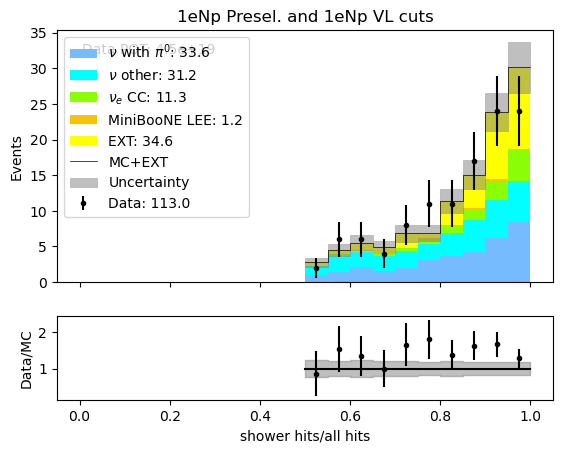

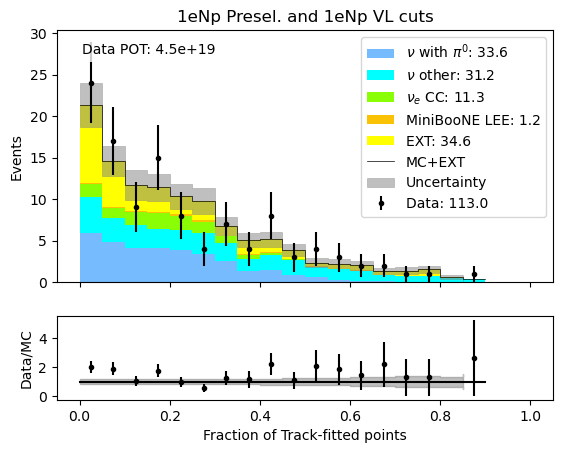

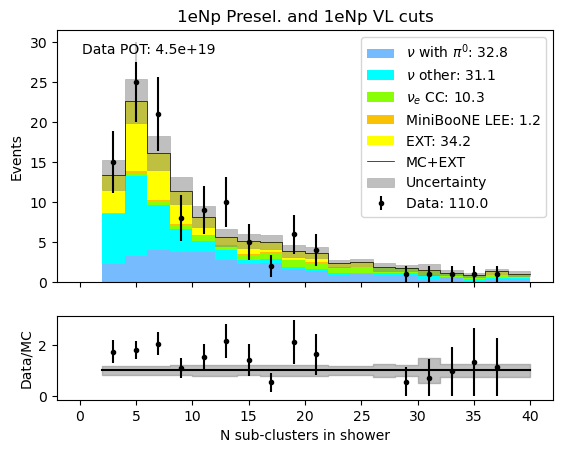

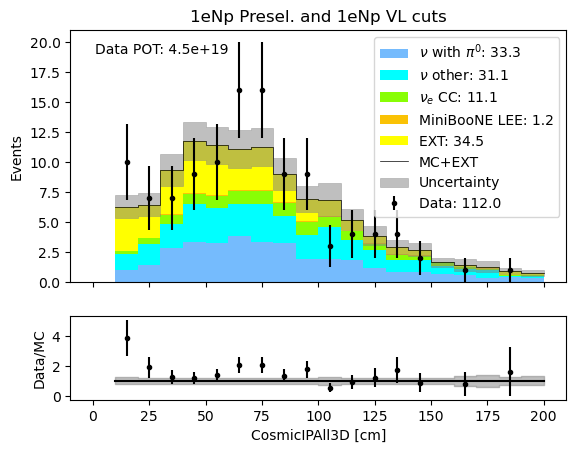

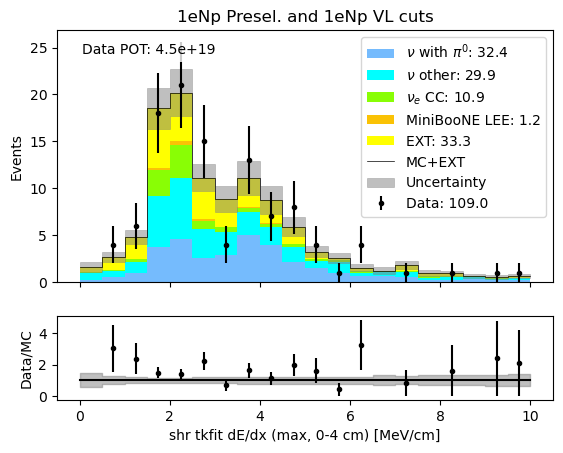

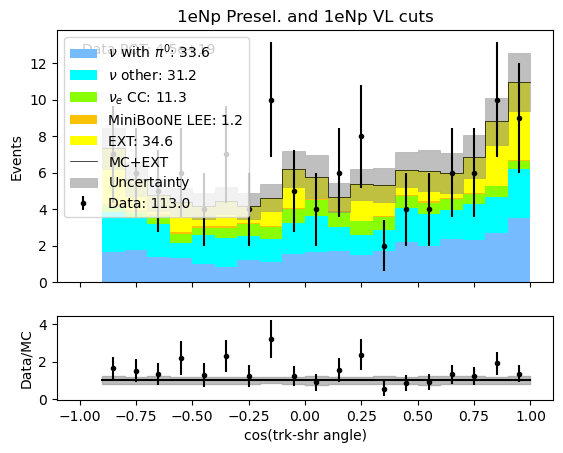

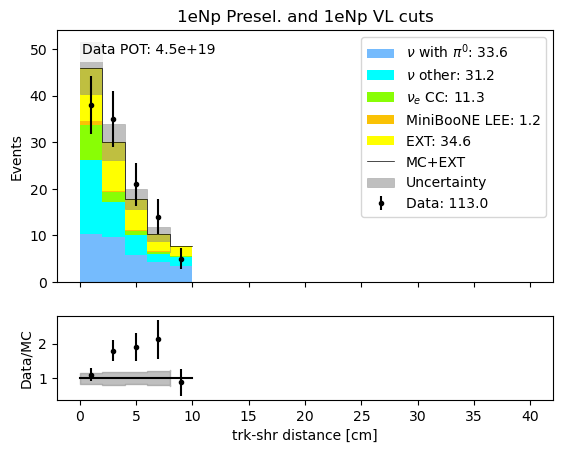

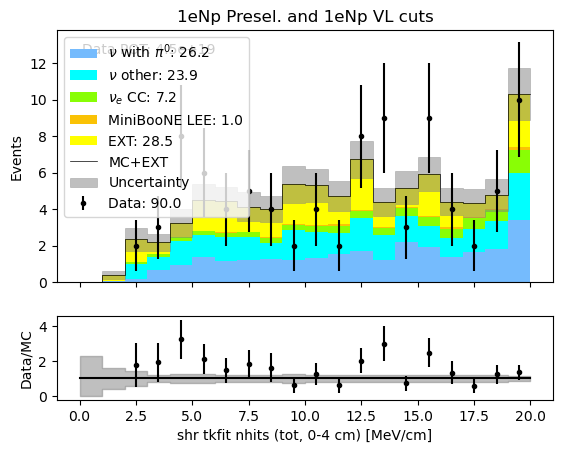

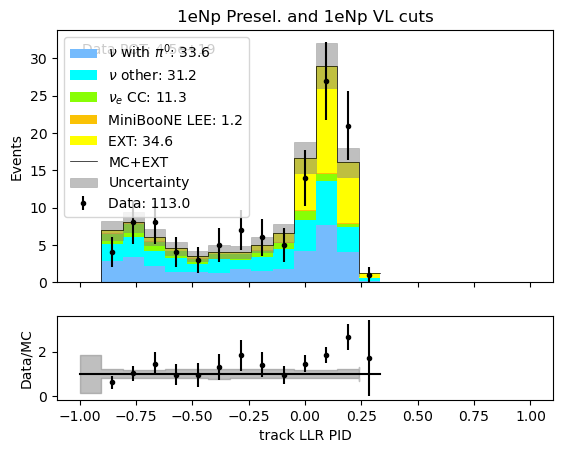

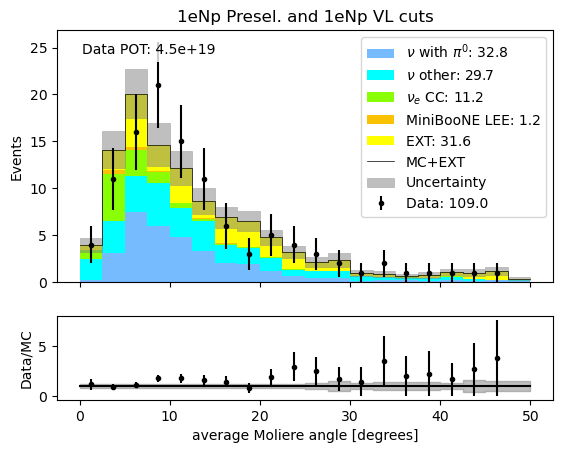

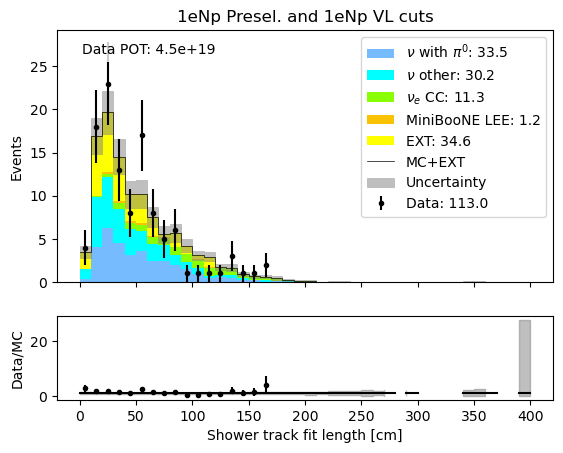

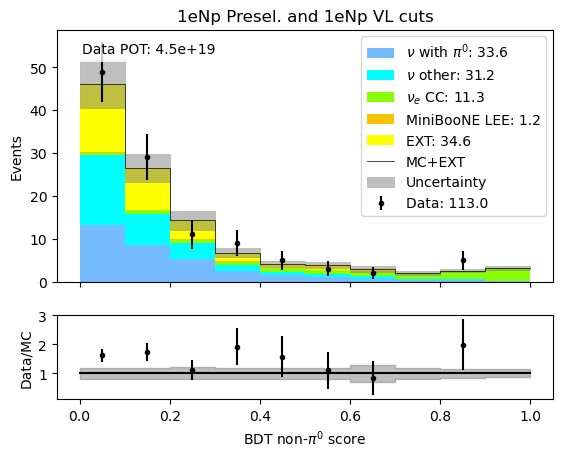

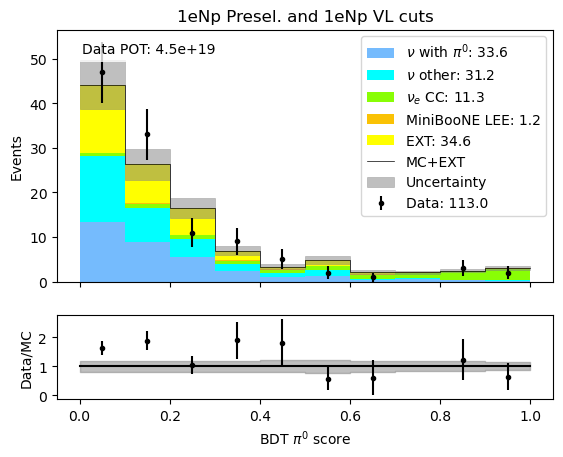

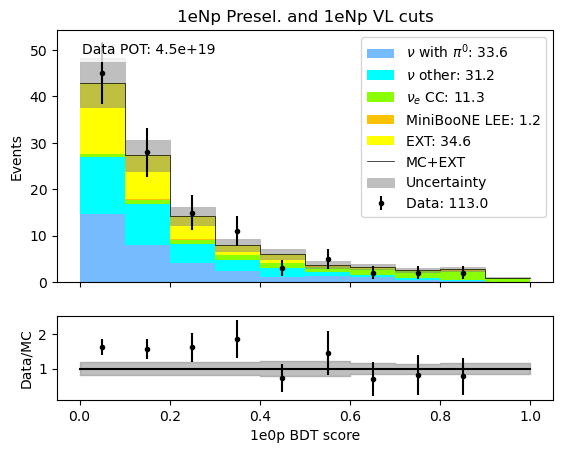

In [37]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

selection = "NPVL"
preselection = "NP"

for binning_def in vdef.loosesel_variables_1eNp:
    # some binning definitions have more than 4 elements,
    # we ignore the last ones for now
    binning = hist.Binning.from_config(*binning_def[:4])
    signal_generator = hist.RunHistGenerator(
        rundata,
        binning,
        data_pot=data_pot,
        selection=selection,
        preselection=preselection,
        sideband_generator=None,
        uncertainty_defaults=None,
    )
    plotter = rp.RunHistPlotter(signal_generator)
    axes = plotter.plot(
        category_column="paper_category",
        include_multisim_errors=True,
        add_ext_error_floor=False,
        show_data_mc_ratio=True,
    )
    plt.show()